# Housing Price Prediction - Advance Regression Assignment 

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the Data

In [345]:
# read the csv data
housing_df = pd.read_csv('train.csv')

In [346]:
# display first few records
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [347]:
# check the shape of df
housing_df.shape

(1460, 81)

In [348]:
# check the properties of df
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 2: Data Preparation and Visualization

In [349]:
# check if there are any columns which have all values as null
all_null_columns = [col for col in housing_df.columns if housing_df[col].isnull().all()]
print(all_null_columns)

[]


In [350]:
# check if there are any columns which have all null values
null_value_columns = [col for col in housing_df.columns if housing_df[col].isnull().any()]
print(null_value_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [351]:
# calculate the % of null values in the columns
print(round((housing_df[null_value_columns].isnull().sum()/housing_df.Id.count())*100,2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [352]:
# dropping columns which have > ~50% null data
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [353]:
# update the column list which have null values
null_value_columns = [col for col in housing_df.columns if housing_df[col].isnull().any()]
print(null_value_columns)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [354]:
# calculate the % of null values in the columns
print(round((housing_df[null_value_columns].isnull().sum()/housing_df.Id.count())*100,2))

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


In [355]:
# impute the null values with median value for LotFrontage
print(housing_df.LotFrontage.describe())
print(housing_df.LotFrontage.value_counts())
housing_df.LotFrontage = housing_df.LotFrontage.fillna(housing_df.LotFrontage.median())
print(housing_df.LotFrontage.value_counts())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64


In [356]:
# impute the null values with None (None) value for MasVnrType
print(housing_df.MasVnrType.value_counts())
housing_df.MasVnrType = housing_df.MasVnrType.fillna('None')
print(housing_df.MasVnrType.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [357]:
# impute the null values with 0.0 value for MasVnrArea
print(housing_df.MasVnrArea.value_counts())
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna('0.0')
print(housing_df.MasVnrArea.value_counts())

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
0.0      861
72.0       8
108.0      8
0.0        8
180.0      8
        ... 
528.0      1
673.0      1
219.0      1
541.0      1
510.0      1
Name: MasVnrArea, Length: 328, dtype: int64


In [358]:
# impute the null values with NA (No Basement) for all Bsmt columns

housing_df.BsmtQual = housing_df.BsmtQual.fillna('NA')
housing_df.BsmtCond = housing_df.BsmtCond.fillna('NA')
housing_df.BsmtExposure = housing_df.BsmtExposure.fillna('NA')
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna('NA')
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna('NA')

In [359]:
# impute the null values with SBrkr for Electrical

print(housing_df.Electrical.value_counts())
housing_df.Electrical = housing_df.Electrical.fillna('SBrkr')
print(housing_df.Electrical.value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [360]:
# impute the null values with NA (No Garage) for all Garage columns

housing_df.GarageType = housing_df.GarageType.fillna('NA')
housing_df.GarageFinish = housing_df.GarageFinish.fillna('NA')
housing_df.GarageQual = housing_df.GarageQual.fillna('NA')
housing_df.GarageCond = housing_df.GarageCond.fillna('NA')

In [361]:
# impute the null values with mode value for GarageYrBlt
print(housing_df.GarageYrBlt.mode())
housing_df.GarageYrBlt = housing_df.GarageYrBlt.replace(np.nan, 2005.0)

0    2005.0
dtype: float64


In [362]:
# verify if all null values are imputed, there are no null values
print([col for col in housing_df.columns if housing_df[col].isnull().any()])

[]


### There are no null values in the df now

In [363]:
# print the shape after data cleaning
housing_df.shape

(1460, 76)

In [364]:
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# GarageYrBlt: Year garage was built
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

# add few new columns which will give various ages
# age will be = year sold (year) - 1 + (months/12) (years) - year built/modified (year)
housing_df['AgeOfBuild'] = round(housing_df.YrSold - 1 + (housing_df.MoSold/12) - housing_df.YearBuilt, 2)
housing_df['AgeOfRemodel'] = round(housing_df.YrSold - 1 + (housing_df.MoSold/12) - housing_df.YearRemodAdd, 2)
housing_df['AgeOfGarage'] = round(housing_df.YrSold - 1 + (housing_df.MoSold/12) - housing_df.GarageYrBlt, 2)

In [365]:
# drop the year / month columns , we will not use them
housing_df.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [366]:
# drop the Id column , we will not use them
housing_df.drop(['Id'], axis=1, inplace=True)

In [367]:
# print the shape
housing_df.shape

(1460, 73)

In [368]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [369]:
# get the numeric and categoricals columns in the df
numeric_cols = list(housing_df.select_dtypes(exclude=['object']).columns)
categorical_cols = list(housing_df.select_dtypes(include=['object']).columns)

print('numeric_cols', len(numeric_cols))
print('categorical_cols', len(categorical_cols))

numeric_cols 34
categorical_cols 39


In [370]:
# check few rows of categorical columns in the df
housing_df[categorical_cols].head().transpose()

,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
Condition1,Norm,Feedr,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm


In [371]:
# MasVnrArea has numeric values, make it numeric column
housing_df.MasVnrArea.value_counts()

housing_df.MasVnrArea = housing_df.MasVnrArea.astype(float)

In [372]:
# update the numeric and categorical col list
numeric_cols = list(housing_df.select_dtypes(exclude=['object']).columns)
categorical_cols = list(housing_df.select_dtypes(include=['object']).columns)

print('numeric_cols', len(numeric_cols))
print('categorical_cols', len(categorical_cols))

numeric_cols 35
categorical_cols 38


In [373]:
# check few rows of numeric columns in the df
housing_df[numeric_cols].head().transpose()

,0,1,2,3,4
MSSubClass,60.00,20.00,60.00,70.00,60.0
LotFrontage,65.00,80.00,68.00,60.00,84.0
LotArea,8450.00,9600.00,11250.00,9550.00,14260.0
OverallQual,7.00,6.00,7.00,7.00,8.0
OverallCond,5.00,8.00,5.00,5.00,5.0
MasVnrArea,196.00,0.00,162.00,0.00,350.0
BsmtFinSF1,706.00,978.00,486.00,216.00,655.0
BsmtFinSF2,0.00,0.00,0.00,0.00,0.0
BsmtUnfSF,150.00,284.00,434.00,540.00,490.0
TotalBsmtSF,856.00,1262.00,920.00,756.00,1145.0


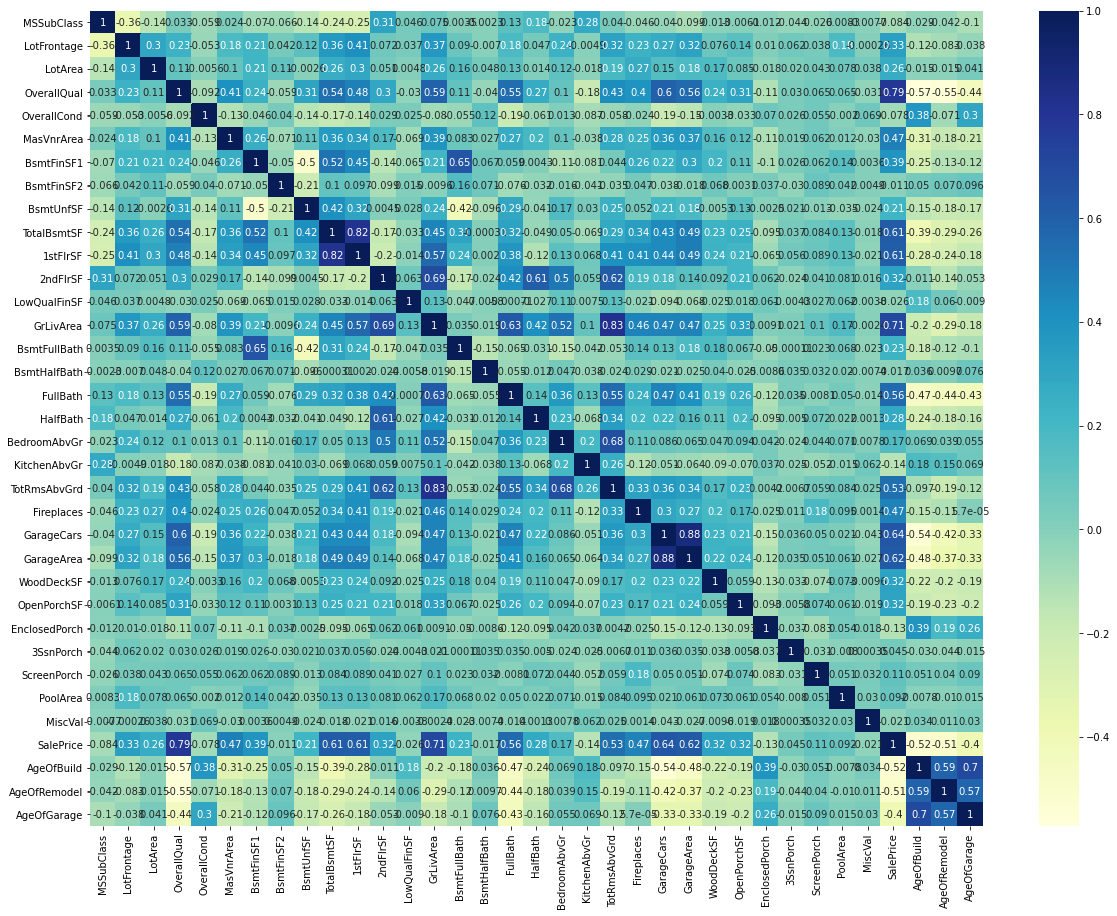

In [374]:
# Let us check correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(20,15))
sns.heatmap(housing_df[numeric_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

## Visualizing some data in numeric columns which have high correlation with the target variable (SalePrice)

### 1) SalePrice vs OverallQual - SalePrice increases with increase in OverallQual

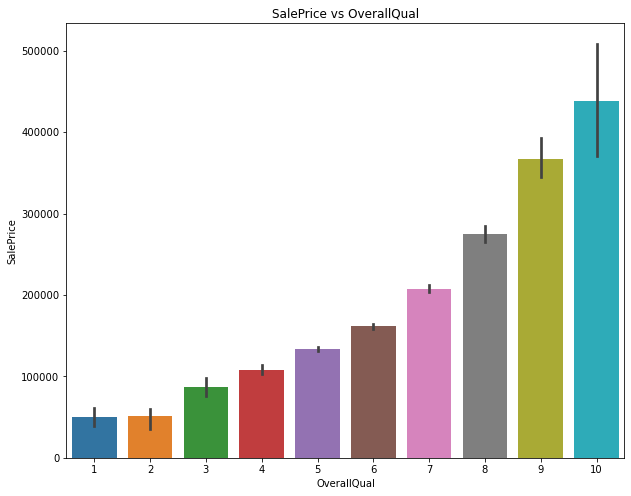

In [375]:
plt.figure(figsize=(10,8))
plt.title('SalePrice vs OverallQual')
sns.barplot(x='OverallQual', y='SalePrice', data=housing_df)
plt.show()

### 2) SalePrice vs GrLivArea - SalePrice increases with increase in GrLivArea

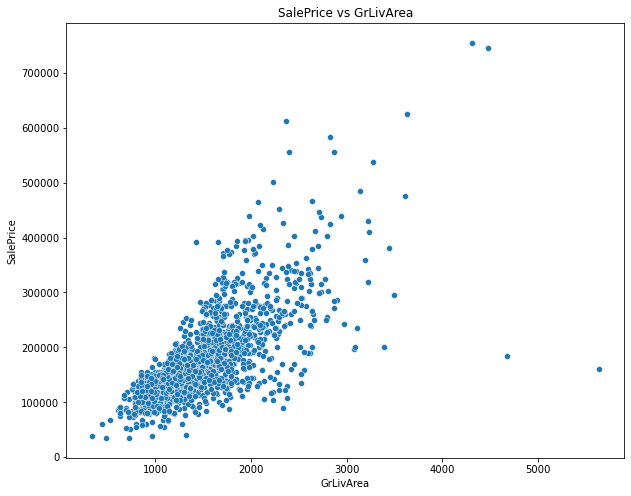

In [376]:
plt.figure(figsize=(10,8))
plt.title('SalePrice vs GrLivArea')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing_df)
plt.show()

### 2) SalePrice vs AgeOfBuild - SalePrice decreases with increase in AgeOfBuild

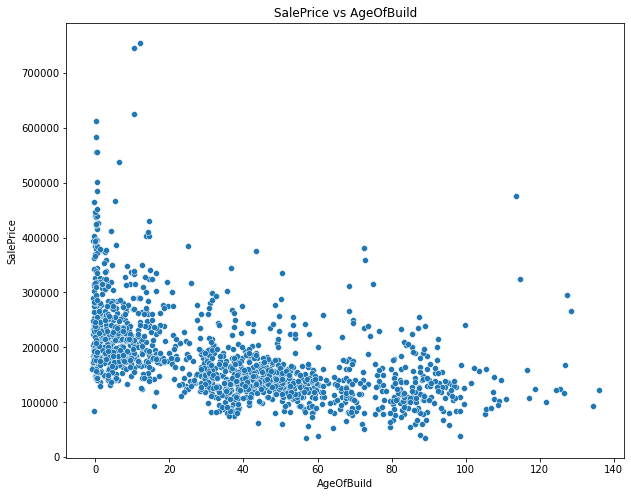

In [377]:
plt.figure(figsize=(10,8))
plt.title('SalePrice vs AgeOfBuild')
sns.scatterplot(x='AgeOfBuild', y='SalePrice', data=housing_df)
plt.show()

### 4) Check the distribution of the target varibale 'SalePrice'

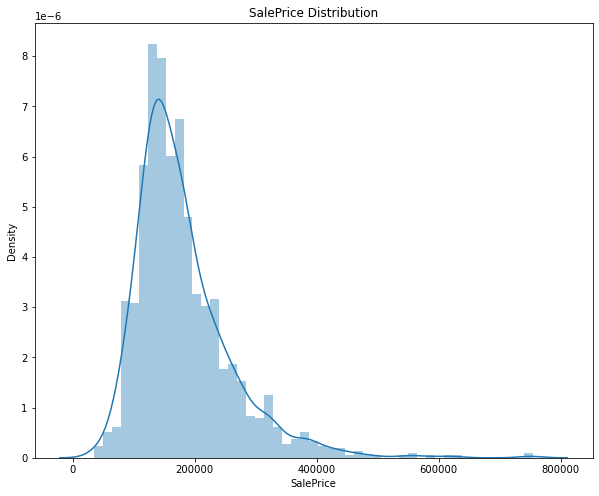

In [378]:
plt.figure(figsize=(10,8))
plt.title('SalePrice Distribution')
sns.distplot(housing_df['SalePrice'])
plt.show()

### The SalePrice figures are skewed towards left
### We can apply the log transformation to get a centrally distributed data

In [379]:
# log transformation on the SalePrice
housing_df.SalePrice = np.log1p(housing_df.SalePrice)

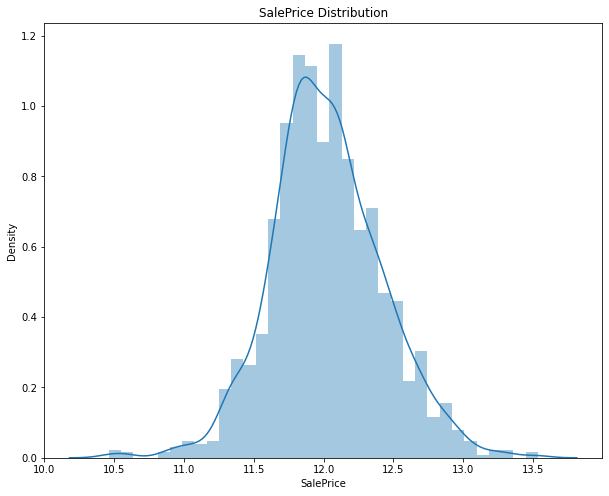

In [380]:
plt.figure(figsize=(10,8))
plt.title('SalePrice Distribution')
sns.distplot(housing_df['SalePrice'])
plt.show()

### Create dummy variables for the categorical columns

In [381]:
# dummy variables
data = pd.get_dummies(housing_df, drop_first=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [382]:
data.shape

(1460, 240)

In [383]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 240 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(6), int64(29), uint8(205)
memory usage: 691.6 KB


# Step 3: Model Building and Evaluation

In [385]:
# split into train and test
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [386]:
# instantiate the scaler object
scaler = StandardScaler()

# pop the target variable 'SalePrice' from the numeric column list
numeric_cols.remove('SalePrice')

# fit scaler on data
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [387]:
# shape of train and test data
print(df_train.shape)
print(df_test.shape)

(1021, 240)
(438, 240)


In [388]:
# training dataset
y_train = df_train.pop('SalePrice')
X_train = df_train

In [389]:
# test dataset
y_test = df_test.pop('SalePrice')
X_test = df_test

## Linear Regression

In [390]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [391]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

8.234494073350344
[-1.12485585e-02  7.95023678e-03  3.19608674e-02  5.52202237e-02
  3.96569883e-02  6.73296927e-04 -2.66011385e+10 -9.77499773e+09
 -2.56703070e+10  2.62693924e+10 -6.92047388e+10 -7.56887487e+10
 -8.38226310e+09  9.25057597e+10  1.23577118e-02  3.42369080e-04
  3.87978554e-03  2.68745422e-03  7.06863403e-03 -1.48677826e-02
  2.99167633e-03  1.03573799e-02  1.28946304e-02  2.32191086e-02
  1.05161667e-02  4.60648537e-03  5.55324554e-03  4.64200974e-03
  8.27503204e-03  1.74283981e-03  8.58306885e-04 -6.28080368e-02
 -2.43377686e-02  3.85284424e-04  4.36501265e-01  4.33752358e-01
  4.29899693e-01  3.78048420e-01  8.79977942e-02  1.28674507e-02
 -7.53721595e-03  5.40733337e-03  4.04024124e-03 -1.09039545e-02
  1.70114636e-02 -6.66426271e-02  3.24926376e-02 -3.36189419e-02
 -1.60347447e-02 -4.88144159e-03  2.45264620e-02 -2.14560658e-01
  6.52669966e-02 -3.25925350e-02  8.24892521e-02  6.07475936e-02
  9.27090645e-03  1.65302277e-01 -3.17888260e-02  1.80078149e-02
  4.276

In [392]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9580145357784993
-2.394086905440164e+18
6.738254856683978
1.725361163156619e+20
0.006599661955616042
3.9391807378005e+17


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [393]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [394]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 20}


In [395]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02237381 -0.00871957  0.01650482  0.08404443  0.04086261  0.00014675
 -0.00058771  0.0070467   0.00596868  0.00785955  0.03560562  0.03982371
  0.00220654  0.05942095  0.03048122  0.00352659  0.01997576  0.01218198
  0.01147735 -0.01239748  0.01928743  0.02139752  0.04178088  0.00800837
  0.0129576  -0.00222857  0.00883091  0.00789693  0.01108821 -0.01650404
 -0.00174318 -0.03904862 -0.02382242  0.00630285  0.03631459  0.02165214
  0.04709999 -0.00803822  0.01864503  0.01684079 -0.03272017  0.00117101
  0.02424393  0.02832032  0.03156598 -0.00686178  0.03027801 -0.02570752
 -0.00477399 -0.00676848  0.02347484 -0.00472549 -0.00191511 -0.01761482
  0.01764699  0.03832098 -0.01601605  0.08027221 -0.06968545 -0.02258891
 -0.05045334 -0.03046991 -0.0204764  -0.00933289 -0.00871913 -0.01164395
  0.03468135  0.06722614 -0.01781909  0.00862876 -0.02087459 -0.00943813
  0.05599899  0.03692703 -0.0129468   0.020288   -0.00426051  0.05251409
  0.012054   -0.02243365 -0.02049072  0.01983582 -0

In [396]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9133918921349062
0.8877526474422294
13.899751122706963
8.089398188939999
0.013613860061417201
0.018468945636849313


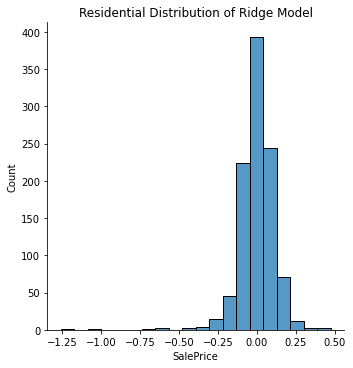

In [397]:
res = y_train - y_pred_train
sns.displot(res, bins=20)
plt.title('Residential Distribution of Ridge Model')
plt.show()

## Lasso

In [398]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [399]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [400]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [401]:
lasso.coef_

array([-2.12882593e-02, -1.54825901e-03,  1.87149438e-02,  6.65343621e-02,
        3.75021165e-02,  2.55552445e-04,  5.35241948e-03,  5.50674687e-03,
       -0.00000000e+00,  2.33562138e-02,  7.60182767e-02,  8.28382852e-02,
        5.01422789e-03,  3.25884072e-02,  2.26581674e-02,  2.09883976e-03,
        1.06411985e-02,  5.45314356e-03,  7.85139904e-03, -1.13775145e-02,
        6.73535379e-03,  1.34470245e-02,  3.51999195e-02,  6.37515869e-03,
        1.04561217e-02,  4.62412302e-03,  7.30645616e-03,  6.41399292e-03,
        8.76665698e-03, -9.35865765e-03, -1.72780349e-03, -4.53006332e-02,
       -2.43437340e-02,  4.33899984e-03,  3.23371371e-01,  3.31736808e-01,
        3.36313621e-01,  2.89541243e-01,  1.75100963e-02,  7.26634127e-03,
       -6.87353284e-02,  4.67035384e-03,  2.51203588e-02,  4.39372314e-02,
        3.49954293e-02, -2.05929204e-02,  3.95963250e-02, -3.87062679e-02,
       -0.00000000e+00, -5.74053515e-03,  1.30754847e-02, -2.81771377e-02,
        0.00000000e+00, -

In [402]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9463467017789906
0.8775760029113736
8.610827676157779
8.822804616454818
0.008433719565286758
0.02014338953528497


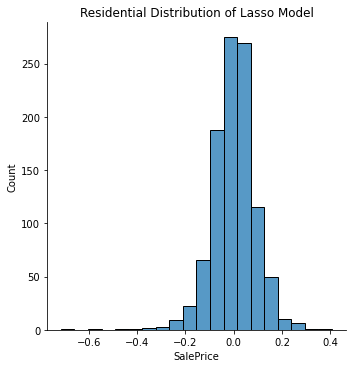

In [403]:
res = y_train - y_pred_train
sns.displot(res, bins=20)
plt.title('Residential Distribution of Lasso Model')
plt.show()

In [404]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.580145e-01,0.913392,0.946347
1,R2 Score (Test),-2.394087e+18,0.887753,0.877576
2,RSS (Train),6.738255e+00,13.899751,8.610828
3,RSS (Test),1.725361e+20,8.089398,8.822805
4,MSE (Train),8.123830e-02,0.116678,0.091835
5,MSE (Test),6.276289e+08,0.135900,0.141927


## Let us observe the changes in the coefficients after regularization

In [405]:
betas = pd.DataFrame(index=X_train.columns)

In [406]:
betas.rows = X_train.columns

In [407]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas['LinearAbsValue'] = abs(betas['Linear'])
betas['RidgeAbsValue'] = abs(betas['Ridge'])
betas['LassoAbsValue'] = abs(betas['Lasso'])

In [408]:
# display the top 10 variables as per the linear model , use abs value of co-efficients to get the dependent variables (positive or negative)
betas[['Linear', 'LinearAbsValue']].sort_values(by='LinearAbsValue', ascending=False).head(10)

,Linear,LinearAbsValue
GrLivArea,9.250576e+10,9.250576e+10
2ndFlrSF,-7.568875e+10,7.568875e+10
1stFlrSF,-6.920474e+10,6.920474e+10
BsmtFinSF1,-2.660114e+10,2.660114e+10
TotalBsmtSF,2.626939e+10,2.626939e+10
BsmtUnfSF,-2.567031e+10,2.567031e+10
GarageFinish_NA,2.082276e+10,2.082276e+10
GarageType_NA,-1.437174e+10,1.437174e+10
BsmtQual_NA,-1.275943e+10,1.275943e+10
BsmtFinSF2,-9.774998e+09,9.774998e+09


In [409]:
# display the top 10 variables as per the ridge model , use abs value of co-efficients to get the dependent variables (positive or negative)
betas[['Ridge', 'RidgeAbsValue']].sort_values(by='RidgeAbsValue', ascending=False).head(10)

,Ridge,RidgeAbsValue
OverallQual,0.084044,0.084044
Neighborhood_Crawfor,0.080272,0.080272
Neighborhood_Edwards,-0.069685,0.069685
Neighborhood_NridgHt,0.067226,0.067226
GrLivArea,0.059421,0.059421
Neighborhood_Somerst,0.055999,0.055999
Condition1_Norm,0.052514,0.052514
Condition2_PosN,-0.051149,0.051149
Neighborhood_IDOTRR,-0.050453,0.050453
MSZoning_RL,0.047100,0.047100


In [410]:
# display the top 10 variables as per the lasso model , use abs value of co-efficients to get the dependent variables (positive or negative)
betas[['Lasso', 'LassoAbsValue']].sort_values(by='LassoAbsValue', ascending=False).head(10)

,Lasso,LassoAbsValue
Condition2_PosN,-1.305686,1.305686
RoofMatl_WdShngl,1.152513,1.152513
RoofMatl_CompShg,1.089535,1.089535
RoofMatl_Roll,1.045244,1.045244
RoofMatl_WdShake,1.020874,1.020874
RoofMatl_Tar&Grv,1.019440,1.019440
RoofMatl_Membran,0.984333,0.984333
RoofMatl_Metal,0.922412,0.922412
MSZoning_RL,0.336314,0.336314
MSZoning_RH,0.331737,0.331737


# Conclusion from the models
## - The Linear Regression shows highly different R2 train and test scores , hence cleary the model is overfit
##  - The Ridge model has a good similar R2 score , hence we will determine the variables using this model
## - Top 10 variables are (negative and positive relation) :-

In [411]:
betas[['Ridge', 'RidgeAbsValue']].sort_values(by='RidgeAbsValue', ascending=False).head(10)

,Ridge,RidgeAbsValue
OverallQual,0.084044,0.084044
Neighborhood_Crawfor,0.080272,0.080272
Neighborhood_Edwards,-0.069685,0.069685
Neighborhood_NridgHt,0.067226,0.067226
GrLivArea,0.059421,0.059421
Neighborhood_Somerst,0.055999,0.055999
Condition1_Norm,0.052514,0.052514
Condition2_PosN,-0.051149,0.051149
Neighborhood_IDOTRR,-0.050453,0.050453
MSZoning_RL,0.047100,0.047100


# Subjective Questions

## Question 1:
##### a) What is the optimal value of alpha for ridge and lasso regression?
##### b) What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?
##### c) What will be the most important predictor variables after the change is implemented?

### Answer 1.a
aplha for ridge = 20
alpha for lasso = 0.0001

### Answer 1.b

In [412]:
# Ridge model for double of alpha = 20*2
alpha = 20*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('R2 Train: ', r2_score(y_train, y_pred_train))
print('R2 Test: ', r2_score(y_test, y_pred_test))

print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print(ridge.coef_)

R2 Train:  0.9061950057634474
R2 Test:  0.8852150362443965
RMSE Train:  0.12142953901397889
RMSE Test:  0.13742808628083644
[-2.14693889e-02 -7.49766091e-03  1.61366675e-02  8.58017097e-02
  4.14492529e-02  2.17999996e-03  2.42129010e-03  6.58605508e-03
  6.74236005e-03  1.14911755e-02  3.41705249e-02  3.51728162e-02
  2.37759385e-03  5.45574495e-02  3.03630280e-02  3.67191232e-03
  2.15403417e-02  1.35256259e-02  1.08419154e-02 -1.23168688e-02
  2.15132174e-02  2.43642642e-02  3.93930743e-02  1.13994052e-02
  1.31154199e-02 -2.45186441e-03  7.79112174e-03  7.67925082e-03
  1.12916477e-02 -1.78124210e-02 -2.14278376e-03 -3.80300158e-02
 -2.47992687e-02  4.24614869e-03  2.65299445e-02  1.10064639e-02
  3.53304016e-02 -1.99802597e-02  1.16855841e-02  1.19614747e-02
 -2.25540466e-02 -1.04312003e-03  1.54323807e-02  1.89826207e-02
  2.00627797e-02 -3.81445787e-03  2.49089750e-02 -1.63677031e-02
 -2.26368972e-03 -5.26540233e-03  1.83030686e-02 -1.63292551e-03
 -1.17745908e-03 -1.22343867e-0

In [413]:
# Lasso model for double of alpha = 0.0001*2
alpha = 0.0001*2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('R2 Train: ', r2_score(y_train, y_pred_train))
print('R2 Test: ', r2_score(y_test, y_pred_test))

print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print(lasso.coef_)

R2 Train:  0.9320898596820508
R2 Test:  0.8758949461252682
RMSE Train:  0.10331863971554613
RMSE Test:  0.14289852034958772
[-2.37404943e-02 -7.43220452e-03  1.70508155e-02  7.30751098e-02
  3.73946507e-02 -8.96083477e-04 -0.00000000e+00  5.22021705e-03
  4.95821977e-03  2.53300939e-03  1.00522210e-02  9.58571019e-03
 -2.42598319e-03  1.20085961e-01  2.80792037e-02  3.54997015e-03
  1.54887062e-02  7.42893496e-03  9.21691723e-03 -9.42846907e-03
  8.94912720e-03  1.37531487e-02  4.41144600e-02 -0.00000000e+00
  1.13969549e-02  3.03262783e-03  9.13184000e-03  6.60955424e-03
  1.02648717e-02 -1.56104893e-02 -1.72900313e-03 -4.02414660e-02
 -2.38083373e-02  5.75300074e-03  2.36867907e-01  2.47017395e-01
  2.56429324e-01  2.09267111e-01  0.00000000e+00  9.31657783e-03
 -9.63177217e-02  4.96997375e-03  2.85327027e-02  5.15226628e-02
  4.08214990e-02 -0.00000000e+00  3.82715385e-02 -3.88141858e-02
 -0.00000000e+00 -6.01052208e-03  1.03470454e-02 -0.00000000e+00
  0.00000000e+00 -9.24138128e-0

### Answer 1.c

In [414]:
# betas after double alphas
betas['Ridge2Alpha'] = ridge.coef_
betas['Lasso2Alpha'] = lasso.coef_

betas['Ridge2AlphaAbsValue'] = abs(betas['Ridge2Alpha'])
betas['Lasso2AlphaAbsValue'] = abs(betas['Lasso2Alpha'])

In [415]:
# top features for Ridge after aplha double value
betas[['Ridge2Alpha', 'Ridge2AlphaAbsValue']].sort_values(by='Ridge2AlphaAbsValue', ascending=False).head(10)

,Ridge2Alpha,Ridge2AlphaAbsValue
OverallQual,0.085802,0.085802
Neighborhood_Crawfor,0.056926,0.056926
Neighborhood_Edwards,-0.054887,0.054887
GrLivArea,0.054557,0.054557
Neighborhood_NridgHt,0.048325,0.048325
Condition1_Norm,0.044975,0.044975
OverallCond,0.041449,0.041449
Neighborhood_Somerst,0.040101,0.040101
GarageCars,0.039393,0.039393
AgeOfBuild,-0.038030,0.038030


In [416]:
# top features for Lasso after aplha double value
betas[['Lasso2Alpha', 'Lasso2AlphaAbsValue']].sort_values(by='Lasso2AlphaAbsValue', ascending=False).head(10)

,Lasso2Alpha,Lasso2AlphaAbsValue
Condition2_PosN,-1.040286,1.040286
MSZoning_RL,0.256429,0.256429
MSZoning_RH,0.247017,0.247017
MSZoning_FV,0.236868,0.236868
MSZoning_RM,0.209267,0.209267
RoofMatl_WdShngl,0.186783,0.186783
SaleType_ConLD,0.173157,0.173157
Neighborhood_Crawfor,0.144464,0.144464
RoofMatl_CompShg,0.129098,0.129098
GrLivArea,0.120086,0.120086


## Question 3:
##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### The top 5 predictor variables are dropped (selected from Ridge)
1. OverallQual
2. Neighborhood_Crawfor
3. Neighborhood_Edwards
4. GrLivArea
5. Neighborhood_NridgHt

In [417]:
X_train_drop_top5 = X_train.drop(['OverallQual', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'GrLivArea', 'Neighborhood_NridgHt'], axis=1)
X_test_drop_top5 = X_test.drop(['OverallQual', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'GrLivArea', 'Neighborhood_NridgHt'], axis=1)

In [418]:
# Ridge

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge1.fit(X_train_drop_top5, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [421]:
# Printing the best hyperparameter alpha
print(model_cv_ridge1.best_params_)

{'alpha': 20}


In [423]:
# Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_drop_top5, y_train)

y_pred_train = ridge.predict(X_train_drop_top5)
y_pred_test = ridge.predict(X_test_drop_top5)

In [424]:
print('R2 Train: ', r2_score(y_train, y_pred_train))
print('R2 Test: ', r2_score(y_test, y_pred_test))

print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 Train:  0.8945190070021595
R2 Test:  0.8710792825649545
RMSE Train:  0.1287651892681895
RMSE Test:  0.14564458922935142


In [425]:
# Lasso

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso1.fit(X_train_drop_top5, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [426]:
# Printing the best hyperparameter alpha
print(model_cv_lasso1.best_params_)

{'alpha': 0.0001}


In [427]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_drop_top5, y_train)

y_pred_train = lasso.predict(X_train_drop_top5)
y_pred_test = lasso.predict(X_test_drop_top5)

In [428]:
print('R2 Train: ', r2_score(y_train, y_pred_train))
print('R2 Test: ', r2_score(y_test, y_pred_test))

print('RMSE Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print(lasso.coef_)

R2 Train:  0.9388953731530078
R2 Test:  0.8568573023981292
RMSE Train:  0.09800504081941566
RMSE Test:  0.15346791642369104
[-1.51785928e-02 -1.16405217e-03  1.90345464e-02  4.54010060e-02
  3.77293908e-03  7.83150574e-03  8.51290716e-03 -0.00000000e+00
  3.03573927e-02  1.17236007e-01  1.14972341e-01  1.05949094e-02
  1.59623461e-02 -3.88354897e-04  1.28045159e-02  2.62565189e-03
  3.42818005e-03 -1.85173339e-02  7.87898395e-03  2.43850958e-02
  3.54843311e-02  1.56925876e-02  7.84747147e-03  3.96591865e-03
  8.38356056e-03  6.62867774e-03  7.84126532e-03 -1.11079298e-02
 -2.97764544e-04 -5.95622420e-02 -2.61140886e-02  1.19498074e-02
  3.63703223e-01  3.75445619e-01  3.59700636e-01  3.09447409e-01
  3.24950764e-02  0.00000000e+00 -7.89560981e-02 -0.00000000e+00
  4.77594016e-02  4.54537630e-02  2.19276337e-02 -0.00000000e+00
  3.09860641e-02 -3.18682680e-02  0.00000000e+00 -4.30362487e-03
  5.86721605e-03 -5.21984133e-02 -0.00000000e+00 -4.46762102e-03
  2.90873648e-02  4.66269479e-0

In [429]:
# betas after top 5 feature dropped
betas_new = pd.DataFrame(index=X_train_drop_top5.columns)
betas_new.rows = X_train_drop_top5.columns


betas_new['RidgeTop5Dropped'] = ridge.coef_
betas_new['LassoTop5Dropped'] = lasso.coef_

betas_new['RidgeTop5DroppedaAbsValue'] = abs(betas_new['RidgeTop5Dropped'])
betas_new['LassoTop5DroppedAlphaAbsValue'] = abs(betas_new['LassoTop5Dropped'])

In [430]:
# top features for Ridge after aplha double value
betas_new[['RidgeTop5Dropped', 'RidgeTop5DroppedaAbsValue']].sort_values(by='RidgeTop5DroppedaAbsValue', ascending=False).head(10)

,RidgeTop5Dropped,RidgeTop5DroppedaAbsValue
2ndFlrSF,0.088570,0.088570
1stFlrSF,0.083854,0.083854
BsmtQual_TA,-0.057702,0.057702
Condition2_PosN,-0.056617,0.056617
KitchenQual_TA,-0.055673,0.055673
Functional_Typ,0.055067,0.055067
Condition1_Norm,0.053587,0.053587
Neighborhood_Somerst,0.053451,0.053451
AgeOfBuild,-0.052361,0.052361
BsmtQual_Gd,-0.050827,0.050827


In [431]:
# top features for Lasso after aplha double value
betas_new[['LassoTop5Dropped', 'LassoTop5DroppedAlphaAbsValue']].sort_values(by='LassoTop5DroppedAlphaAbsValue', ascending=False).head(10)

,LassoTop5Dropped,LassoTop5DroppedAlphaAbsValue
RoofMatl_WdShngl,1.550220,1.550220
Condition2_PosN,-1.532747,1.532747
RoofMatl_Membran,1.467370,1.467370
RoofMatl_CompShg,1.463574,1.463574
RoofMatl_Tar&Grv,1.408030,1.408030
RoofMatl_Roll,1.400973,1.400973
RoofMatl_WdShake,1.392541,1.392541
RoofMatl_Metal,1.358452,1.358452
MSZoning_RH,0.375446,0.375446
MSZoning_FV,0.363703,0.363703
